# Linear Regression — Normal Equation

In Day 1, linear regression was viewed geometrically as fitting a line by choosing
a direction that minimizes error.

In this notebook, we compute the **exact best-fit parameters** using linear algebra.
This approach is known as the **normal equation**.


## Least Squares as a Projection Problem

Given a dataset $(X, y)$, linear regression aims to minimize the total squared
difference between predictions and targets.

Geometrically:
- The columns of $X$ span a subspace of $\mathbb{R}^n$
- The target vector $y$ generally does not lie in this subspace
- Linear regression finds the vector $Xw$ that is the **orthogonal projection**
  of $y$ onto the column space of $X$

This projected vector corresponds to the predictions $\hat{y}$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## Dataset

A simple one-dimensional dataset is used so that results can be visualized
and compared directly with Day 1.


In [2]:
X = np.linspace(0, 10, 30).reshape(-1, 1)

true_w = np.array([2.0])
true_b = 1.0

noise = np.random.normal(0, 1.0, size=X.shape[0])
y = X @ true_w + true_b + noise


## Bias Handling via Matrix Augmentation

The standard linear model is:

$$
\hat{y} = Xw + b
$$

To avoid treating the bias separately, we augment the data matrix with
a column of ones, allowing the model to be written as:

$$
\hat{y} = X_{\text{aug}} w_{\text{aug}}
$$

The bias becomes the first element of the weight vector.


In [3]:
ones = np.ones((X.shape[0], 1))
X_aug = np.hstack([ones, X])

print("X shape:", X.shape)
print("X_aug shape:", X_aug.shape)


X shape: (30, 1)
X_aug shape: (30, 2)


After augmentation:
- $X_{\text{aug}} \in \mathbb{R}^{n \times (d+1)}$
- $w_{\text{aug}} \in \mathbb{R}^{d+1}$

This allows the bias to be learned as part of a unified parameter vector.


## Normal Equation

The normal equation provides a closed-form solution to the least squares problem:

$$
w = (X^T X)^{-1} X^T y
$$

This expression is obtained by setting the gradient of the squared error
objective to zero and solving the resulting linear system.


In [4]:
XT_X = X_aug.T @ X_aug
XT_y = X_aug.T @ y

w_normal = np.linalg.inv(XT_X) @ XT_y
print("Learned parameters:", w_normal)


Learned parameters: [1.32137836 1.89809495]


In practice, explicitly computing the matrix inverse is discouraged.

From an engineering perspective, solving the linear system

$$
(X^T X) w = X^T y
$$

using numerical solvers (e.g., `np.linalg.solve`) is more stable and efficient
than computing $(X^T X)^{-1}$ directly. The inverse is shown here to make the
mathematics explicit.


In [5]:
y_pred_normal = X_aug @ w_normal


## Comparison with Manual Fit (Day 1)

We compare the normal equation solution with a manually chosen
"good fit" from Day 1.


In [6]:
w_manual = np.array([1.0, 2.0])  # [bias, slope]
y_pred_manual = X_aug @ w_manual


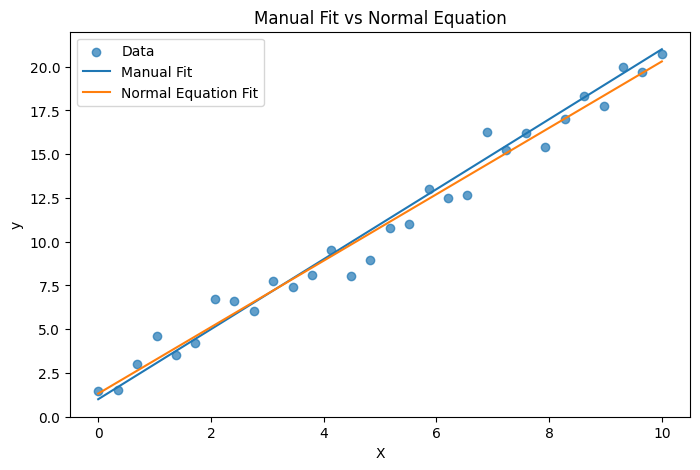

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, y_pred_manual, label="Manual Fit")
plt.plot(X, y_pred_normal, label="Normal Equation Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Manual Fit vs Normal Equation")
plt.show()


The normal equation yields the unique global minimum of the squared error
objective for this dataset. No other linear model can achieve a lower
total squared error.


## Computational Considerations

| Feature | Normal Equation | Gradient Descent |
|-------|-----------------|------------------|
| Complexity | $O(d^3)$ | $O(knd)$ |
| Features ($d$) | Efficient for small $d$ | Scales to millions |
| Samples ($n$) | Scales well | Scales well |
| Learning Rate | Not required | Requires tuning |

This comparison highlights why closed-form solutions are rarely used
for large-scale machine learning systems.


## Summary

- Least squares was interpreted as an orthogonal projection problem
- Bias was absorbed via matrix augmentation
- The normal equation was implemented explicitly
- The analytical solution was validated against a manual fit
- Practical limitations of matrix inversion were identified

This analysis motivates the use of iterative optimization methods.
